In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
ds = pd.read_excel("../datasets/datos.gob.mx/P128_ARRIBA.xlsx",sheet_name='pruebas')

In [7]:
x_std = StandardScaler().fit_transform(ds)

In [13]:
feature = x_std.T
cov_matrix = np.cov(feature)
corr_matrix = ds.corr()
print(cov_matrix)

[[ 1.07142857  0.9761988  -0.19796397  1.03354823  0.8577662   0.21809679]
 [ 0.9761988   1.07142857 -0.54661228  0.87708459  0.97336973  0.55317033]
 [-0.19796397 -0.54661228  1.07142857  0.0283559  -0.61473731 -1.01301349]
 [ 1.03354823  0.87708459  0.0283559   1.07142857  0.74489399  0.00513831]
 [ 0.8577662   0.97336973 -0.61473731  0.74489399  1.07142857  0.69354717]
 [ 0.21809679  0.55317033 -1.01301349  0.00513831  0.69354717  1.07142857]]


([<matplotlib.axis.YTick at 0x15395fc6588>,
 <a list of 6 Text yticklabel objects>)

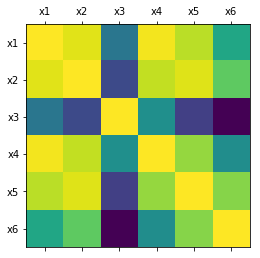

In [21]:
plt.matshow(cov_matrix)
etiquetas = ['x1','x2','x3','x4','x5','x6']
x_pos = np.arange(len(etiquetas))
plt.xticks(x_pos,etiquetas)
y_pos = np.arange(len(etiquetas))
plt.yticks(x_pos,etiquetas)

In [27]:
e_values,e_vectors = np.linalg.eig(cov_matrix)
print("\nEigen valores \n%s" %e_values)
print("\nEigen vectores \n%s" %e_vectors)


Eigen valores 
[4.28112853 1.93711953 0.12947524 0.01334783 0.03986684 0.02763346]

Eigen vectores 
[[ 0.44097488  0.33712688  0.22322618 -0.6706412   0.28504176 -0.33323906]
 [ 0.48969879  0.0818235   0.30168457 -0.05474595 -0.38099658  0.71716868]
 [-0.29792259  0.5793954  -0.49443894 -0.19055424  0.26710699  0.47266921]
 [ 0.3851687   0.46795637  0.08425217  0.71460166  0.31254221 -0.13124526]
 [ 0.4803911  -0.03840038 -0.75123558 -0.01274153 -0.39450126 -0.21817724]
 [ 0.31280639 -0.56876498 -0.2079262  -0.01069906  0.67002446  0.29390136]]


In [58]:
#¿cuanta información se le puede atribuir a cada una de las características?
total_sum = sum(e_values)
var_exp = [(i/total_sum)*100 for i in sorted(e_values,reverse=True)]
var_exp = {'x1':[var_exp[0]],'x2':[var_exp[1]],'x3':[var_exp[2]],'x4':[var_exp[3]],'x5':[var_exp[4]],'x6':[var_exp[5]]}
#var_exp = {var_exp[0],var_exp[1],var_exp[2],var_exp[3],var_exp[4],var_exp[5]}

In [62]:
df = pd.DataFrame(data=var_exp)
df

,x1,x2,x3,x4,x5,x6
0,66.595333,30.132971,2.014059,0.620151,0.429854,0.207633


In [61]:
ds.head()

,Deficiencia mental,Trastornos visuales,Trastornos de audición,Impedimentos motores,Aptitudes sobresalientes,Otros
0,66465,5003,12993,11241,6327,329448
1,69489,4521,13486,12456,5953,330302
2,74725,4822,14023,13163,4601,309375
3,79740,4651,14436,13607,4893,283015
4,81982,4672,14562,14280,4452,259325


In [66]:
total = df.x1+df.x2
print(total)

0    96.728303
dtype: float64


Text(0,0.5,'Aptitudes sobresalientes')

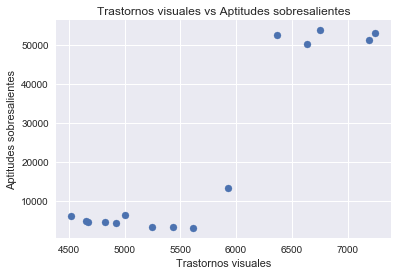

In [83]:
plt.scatter(ds['Trastornos visuales'],ds["Aptitudes sobresalientes"])
plt.title("Trastornos visuales vs Aptitudes sobresalientes")
plt.xlabel("Trastornos visuales")
plt.ylabel("Aptitudes sobresalientes")

In [81]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [90]:
x = preprocessing.scale(ds)
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0,0.5,'Aptitudes sobresalientes')

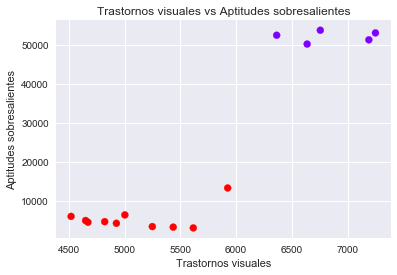

In [91]:
plt.scatter(ds['Trastornos visuales'],ds["Aptitudes sobresalientes"],c=kmeans.fit_predict(x),cmap='rainbow')
plt.title("Trastornos visuales vs Aptitudes sobresalientes")
plt.xlabel("Trastornos visuales")
plt.ylabel("Aptitudes sobresalientes")

In [93]:
kmeans.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])